<a href="https://colab.research.google.com/github/LuisST-2000/Extraccion-de-Data/blob/main/Data_Football.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalamos e importamos las librerías utilizadas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
goalscores = pd.read_csv('/content/drive/MyDrive/Data_Football/goalscorers.csv')
results = pd.read_csv('/content/drive/MyDrive/Data_Football/results.csv')
shootouts = pd.read_csv('/content/drive/MyDrive/Data_Football/shootouts.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
goalscores.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [ ]:
shootouts.head()

,date,home_team,away_team,winner
0,1967-08-22,India,Taiwan,Taiwan
1,1971-11-14,South Korea,Vietnam Republic,South Korea
2,1972-05-07,South Korea,Iraq,Iraq
3,1972-05-17,Thailand,South Korea,South Korea
4,1972-05-19,Thailand,Cambodia,Thailand


In [ ]:
results.describe()

,home_score,away_score
count,44557.000000,44557.000000
mean,1.739278,1.178401
std,1.747263,1.393775
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [ ]:
results.tournament.unique()

array(['Friendly', 'British Home Championship', 'Évence Coppée Trophy',
       'Copa Lipton', 'Copa Newton', 'Copa Premio Honor Argentino',
       'Copa Premio Honor Uruguayo', 'Copa Roca', 'Copa América',
       'Copa Chevallier Boutell', 'Nordic Championship',
       'Central European International Cup', 'Baltic Cup', 'Balkan Cup',
       'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'Bolivarian Games',
       'CCCF Championship', 'NAFC Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'Phillip Seaga Cup',
       'CONCACAF Championship', 'Copa Ju

In [ ]:
#Selecciono toda la data que pertence al torneo de la FIFA World Cup
fifa = results[results.tournament == 'FIFA World Cup']
fifa

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1311,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True
1312,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True
1313,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True
1314,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True
1315,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True
...,...,...,...,...,...,...,...,...,...
44349,2022-12-10,England,France,1,2,FIFA World Cup,Al Khor,Qatar,True
44351,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup,Lusail,Qatar,True
44352,2022-12-14,France,Morocco,2,0,FIFA World Cup,Al Khor,Qatar,True
44356,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,Al Rayyan,Qatar,True


In [ ]:
#Seleccionamos la data que gano como visitante
winner_home_team = fifa["home_team"].where(fifa['home_score'] > fifa["away_score"])

#Creamos una nueva columna llamadad winner y asignamos el nombre del equipo ganador 
new_df_world = fifa.assign(winner = winner_home_team)
new_df_world


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
1311,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,NaN
1312,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,France
1313,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,NaN
1314,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,NaN
1315,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,Argentina
...,...,...,...,...,...,...,...,...,...,...
44349,2022-12-10,England,France,1,2,FIFA World Cup,Al Khor,Qatar,True,NaN
44351,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup,Lusail,Qatar,True,Argentina
44352,2022-12-14,France,Morocco,2,0,FIFA World Cup,Al Khor,Qatar,True,France
44356,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,Al Rayyan,Qatar,True,Croatia


In [ ]:
winner_away_team = fifa["away_team"].where(fifa['away_score'] > fifa["home_score"])
winner_away_team

1311     United States
1312               NaN
1313        Yugoslavia
1314           Romania
1315               NaN
             ...      
44349           France
44351              NaN
44352              NaN
44356              NaN
44358              NaN
Name: away_team, Length: 964, dtype: object

In [ ]:
new_df_world['winner'].fillna(winner_away_team, inplace = True)
new_df_world

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
1311,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,United States
1312,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,France
1313,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,Yugoslavia
1314,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,Romania
1315,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,Argentina
...,...,...,...,...,...,...,...,...,...,...
44349,2022-12-10,England,France,1,2,FIFA World Cup,Al Khor,Qatar,True,France
44351,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup,Lusail,Qatar,True,Argentina
44352,2022-12-14,France,Morocco,2,0,FIFA World Cup,Al Khor,Qatar,True,France
44356,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,Al Rayyan,Qatar,True,Croatia


In [ ]:
# Merge results.csv and shootouts.csv dataframes
merged_df = pd.merge(new_df_world, shootouts, on=['date', 'home_team', 'away_team'], how='left')
merged_df.winner_x.isna().value_counts()
merged_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner_x,winner_y
0,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,United States,NaN
1,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,France,NaN
2,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,Yugoslavia,NaN
3,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,Romania,NaN
4,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,Argentina,NaN
...,...,...,...,...,...,...,...,...,...,...,...
959,2022-12-10,England,France,1,2,FIFA World Cup,Al Khor,Qatar,True,France,NaN
960,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup,Lusail,Qatar,True,Argentina,NaN
961,2022-12-14,France,Morocco,2,0,FIFA World Cup,Al Khor,Qatar,True,France,NaN
962,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,Al Rayyan,Qatar,True,Croatia,NaN


In [ ]:
merged_df['winner_x'].fillna(merged_df['winner_y'], inplace = True)
merged_df = merged_df.drop(['winner_y'], axis = 1)
merged_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner_x
0,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,United States
1,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,France
2,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,Yugoslavia
3,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,Romania
4,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,Argentina
...,...,...,...,...,...,...,...,...,...,...
959,2022-12-10,England,France,1,2,FIFA World Cup,Al Khor,Qatar,True,France
960,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup,Lusail,Qatar,True,Argentina
961,2022-12-14,France,Morocco,2,0,FIFA World Cup,Al Khor,Qatar,True,France
962,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,Al Rayyan,Qatar,True,Croatia


In [ ]:
merged_df = merged_df.rename({'winner_x':'winner'}, axis = 1)
merged_df

In [ ]:
merged_df = merged_df.fillna('Draw')

1. Top 10 paises con partidos mas ganados durante todos los mundiales

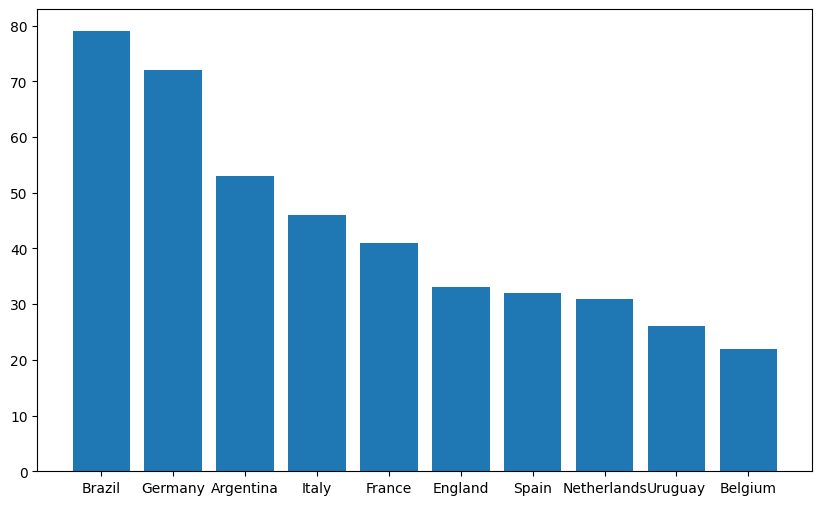

In [63]:
top_10 = merged_df['winner'].where(merged_df['winner'] != 'Draw').value_counts().head(10)
x = top_10.index
y = top_10.values
plt.figure(figsize=(10, 6))
plt.bar(x, y)
plt.show()

In [62]:
#Agregando una fila date_year para filtrar los datos por mundial
date_year = []
for i in range(len(merged_df)):
  date_year.append(merged_df['date'][i][:4])

merged_df = merged_df.assign(date_year = date_year)
merged_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,date_year
0,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,United States,1930
1,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,France,1930
2,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,Yugoslavia,1930
3,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,Romania,1930
4,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,Argentina,1930
...,...,...,...,...,...,...,...,...,...,...,...
959,2022-12-10,England,France,1,2,FIFA World Cup,Al Khor,Qatar,True,France,2022
960,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup,Lusail,Qatar,True,Argentina,2022
961,2022-12-14,France,Morocco,2,0,FIFA World Cup,Al Khor,Qatar,True,France,2022
962,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,Al Rayyan,Qatar,True,Croatia,2022


2. Cantidad de partidos empatados en cada mundial

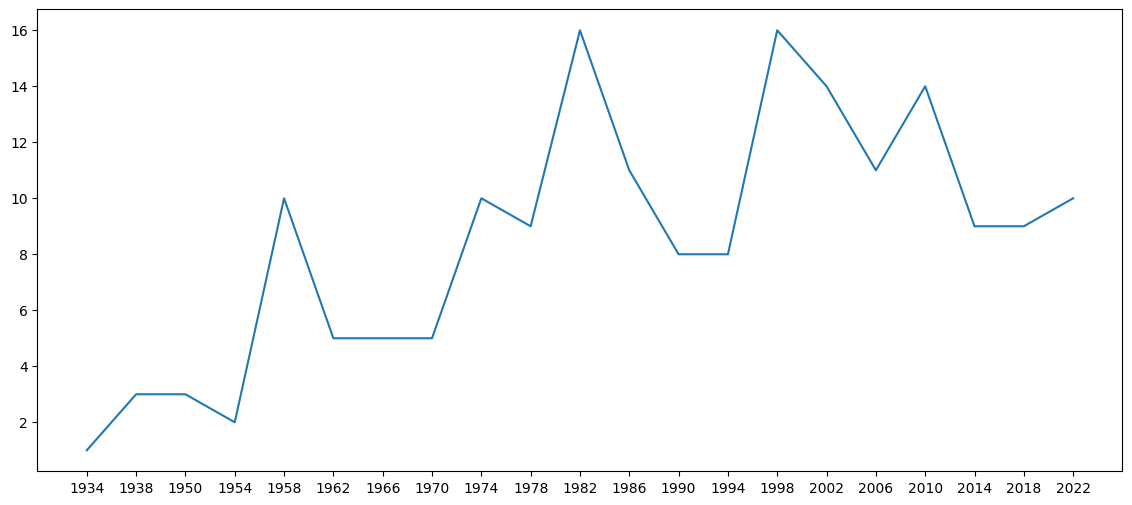

In [145]:
md = merged_df['date_year'].where(merged_df.winner == 'Draw').value_counts().sort_index()
x = md.index
y = md.values
plt.figure(figsize = (14,6))
plt.plot(x,y)
plt.show()
#Se puede concluir que el mundial de 1930 no hubo ningún partido empatado

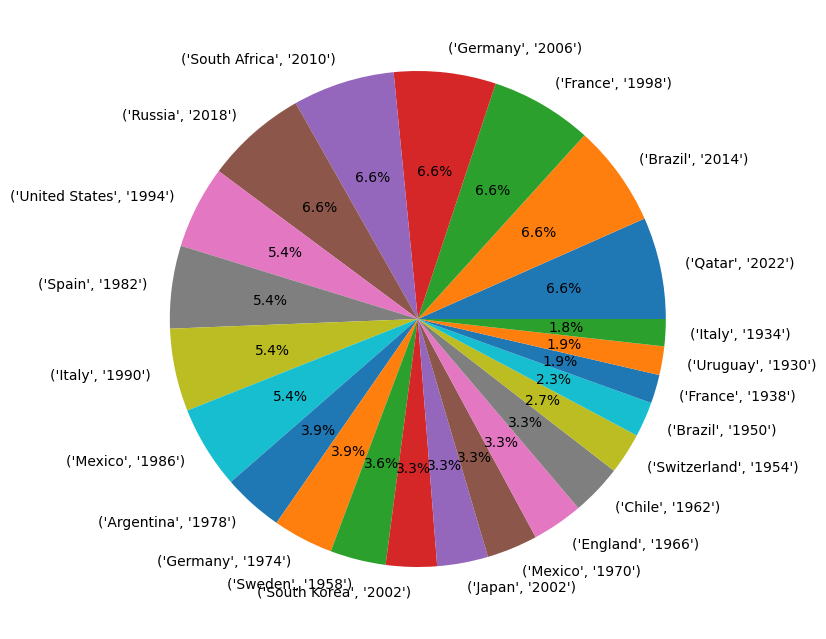

In [118]:
world_cups_matchs = merged_df[['country','date_year']].value_counts()
plt.figure(figsize = (8,10))
plt.pie(world_cups_matchs.values, labels = world_cups_matchs.index, autopct = '%1.1f%%')
plt.show()

In [140]:
mdfd = merged_df['date_year'].where(merged_df.winner == 'Draw').value_counts()
mdfd.sort_index()

1934     1
1938     3
1950     3
1954     2
1958    10
1962     5
1966     5
1970     5
1974    10
1978     9
1982    16
1986    11
1990     8
1994     8
1998    16
2002    14
2006    11
2010    14
2014     9
2018     9
2022    10
Name: date_year, dtype: int64